#Setup

In [1]:
!git clone https://github.com/LETHEVIET/CS106-DSN.git

Cloning into 'CS106-DSN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 161 (delta 87), reused 160 (delta 86), pack-reused 0
Receiving objects: 100% (161/161), 393.36 KiB | 578.00 KiB/s, done.
Resolving deltas: 100% (87/87), done.


In [2]:
!pip install tabulate
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download datasets

In [3]:
%cd /content/CS106-DSN
!mkdir datasets
!mkdir log
%cd datasets
!gdown --id 1TMfkJrZZTf7guIJJwOgaNjbUiRGVRih4
!gdown --id 12E8O-v_YEc0Hv6mwcWoAWxCHJWgptEtO
%cd ..

/content/CS106-DSN
/content/CS106-DSN/datasets
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TMfkJrZZTf7guIJJwOgaNjbUiRGVRih4
To: /content/CS106-DSN/datasets/eccv16_dataset_summe_google_pool5.h5
100% 37.1M/37.1M [00:00<00:00, 49.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12E8O-v_YEc0Hv6mwcWoAWxCHJWgptEtO
To: /content/CS106-DSN/datasets/eccv16_dataset_tvsum_google_pool5.h5
100% 125M/125M [00:02<00:00, 57.7MB/s]
/content/CS106-DSN


Split datasets

In [4]:
!python create_split.py -d datasets/eccv16_dataset_tvsum_google_pool5.h5 --save-dir datasets --save-name tvsum_splits  --num-splits 5
!python create_split.py -d datasets/eccv16_dataset_summe_google_pool5.h5 --save-dir datasets --save-name summe_splits  --num-splits 5

Args:Namespace(dataset='datasets/eccv16_dataset_tvsum_google_pool5.h5', num_splits=5, save_dir='datasets', save_name='tvsum_splits', train_percent=0.8)
Goal: randomly split data for 5 times, 80.0% for training and the rest for testing
Loading dataset from datasets/eccv16_dataset_tvsum_google_pool5.h5
Split breakdown: # total videos 50. # train videos 40. # test videos 10
Splits saved to datasets/tvsum_splits.json
Args:Namespace(dataset='datasets/eccv16_dataset_summe_google_pool5.h5', num_splits=5, save_dir='datasets', save_name='summe_splits', train_percent=0.8)
Goal: randomly split data for 5 times, 80.0% for training and the rest for testing
Loading dataset from datasets/eccv16_dataset_summe_google_pool5.h5
Split breakdown: # total videos 25. # train videos 20. # test videos 5
Splits saved to datasets/summe_splits.json


#Training

DSN models

In [5]:
!python main.py \
      -d datasets/eccv16_dataset_tvsum_google_pool5.h5 \
      -s datasets/tvsum_splits.json \
      -m tvsum --gpu 0 --max-epoch 60 --num-episode 5\
      --save-dir log/DSN_tvsum --split-id 0 --verbose\
      --save-results

Namespace(beta=0.01, dataset='datasets/eccv16_dataset_tvsum_google_pool5.h5', evaluate=False, gamma=0.1, gpu='0', hidden_dim=256, ignore_far_sim=False, input_dim=1024, lr=1e-05, max_epoch=60, metric='tvsum', num_episode=5, num_layers=1, resume='', rnn_cell='lstm', save_dir='log/DSN_tvsum', save_results=True, seed=1, split='datasets/tvsum_splits.json', split_id=0, stepsize=30, sup=False, use_cpu=False, verbose=True, weight_decay=1e-05)
Args:Namespace(beta=0.01, dataset='datasets/eccv16_dataset_tvsum_google_pool5.h5', evaluate=False, gamma=0.1, gpu='0', hidden_dim=256, ignore_far_sim=False, input_dim=1024, lr=1e-05, max_epoch=60, metric='tvsum', num_episode=5, num_layers=1, resume='', rnn_cell='lstm', save_dir='log/DSN_tvsum', save_results=True, seed=1, split='datasets/tvsum_splits.json', split_id=0, stepsize=30, sup=False, use_cpu=False, verbose=True, weight_decay=1e-05)
Currently using GPU 0
Initialize dataset datasets/eccv16_dataset_tvsum_google_pool5.h5
# total videos 50. # train vid

DSN_sup model

In [6]:
!python main.py \
      -d datasets/eccv16_dataset_tvsum_google_pool5.h5 \
      -s datasets/tvsum_splits.json \
      -m tvsum --gpu 0 --max-epoch 60 --num-episode 5\
      --save-dir log/DSN_sup_tvsum --split-id 0 --verbose\
      --sup --save-results

Namespace(beta=0.01, dataset='datasets/eccv16_dataset_tvsum_google_pool5.h5', evaluate=False, gamma=0.1, gpu='0', hidden_dim=256, ignore_far_sim=False, input_dim=1024, lr=1e-05, max_epoch=60, metric='tvsum', num_episode=5, num_layers=1, resume='', rnn_cell='lstm', save_dir='log/DSN_sup_tvsum', save_results=True, seed=1, split='datasets/tvsum_splits.json', split_id=0, stepsize=30, sup=True, use_cpu=False, verbose=True, weight_decay=1e-05)
Args:Namespace(beta=0.01, dataset='datasets/eccv16_dataset_tvsum_google_pool5.h5', evaluate=False, gamma=0.1, gpu='0', hidden_dim=256, ignore_far_sim=False, input_dim=1024, lr=1e-05, max_epoch=60, metric='tvsum', num_episode=5, num_layers=1, resume='', rnn_cell='lstm', save_dir='log/DSN_sup_tvsum', save_results=True, seed=1, split='datasets/tvsum_splits.json', split_id=0, stepsize=30, sup=True, use_cpu=False, verbose=True, weight_decay=1e-05)
Currently using GPU 0
Initialize dataset datasets/eccv16_dataset_tvsum_google_pool5.h5
# total videos 50. # tra

#Visualize results

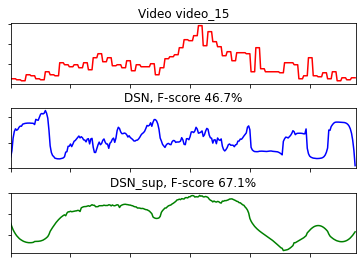

Done video video_15. # frames 4324.


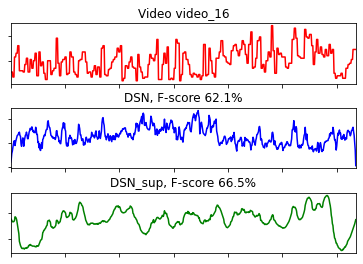

Done video video_16. # frames 9534.


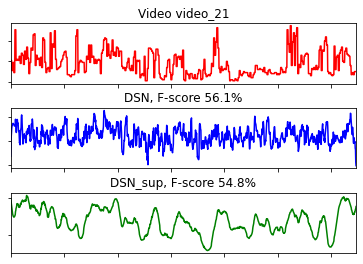

Done video video_21. # frames 19406.


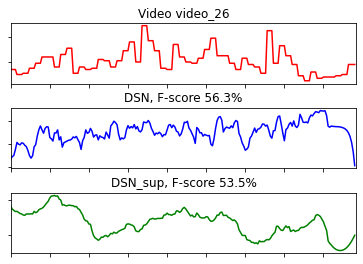

Done video video_26. # frames 3312.


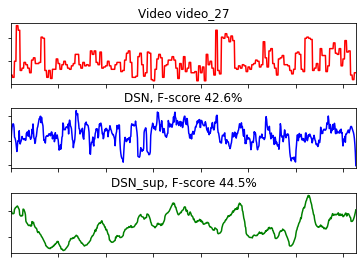

Done video video_27. # frames 10917.


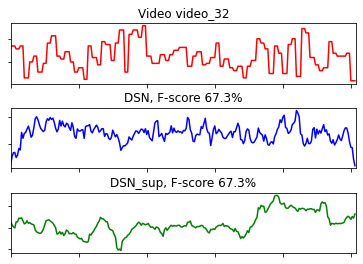

Done video video_32. # frames 3802.


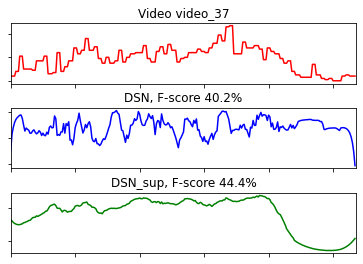

Done video video_37. # frames 4009.


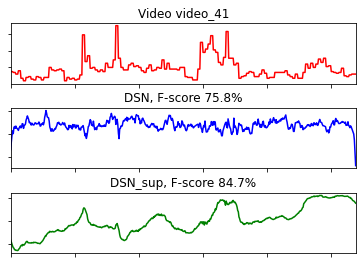

Done video video_41. # frames 8073.


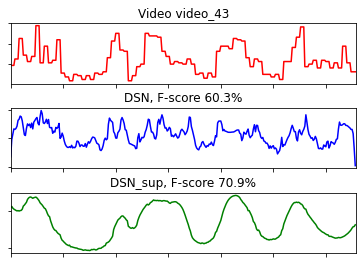

Done video video_43. # frames 4931.


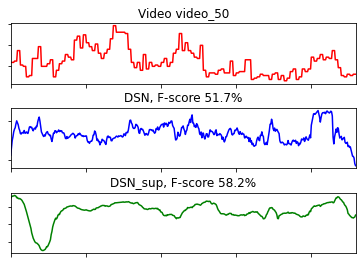

Done video video_50. # frames 6912.


In [8]:
import h5py
from matplotlib import pyplot as plt
import argparse
import os
import os.path as osp

h5_res_DSN = h5py.File('log/DSN_tvsum/result.h5', 'r')
h5_res_DSN_sup = h5py.File('log/DSN_sup_tvsum/result.h5', 'r')
keys = list(h5_res_DSN.keys())

for key in keys:
    score = h5_res_DSN[key]['score'][...]
    score_sup = h5_res_DSN_sup[key]['score'][...]
    machine_summary = h5_res_DSN_sup[key]['machine_summary'][...]
    gtscore = h5_res_DSN_sup[key]['gtscore'][...]
    fm_DSN = h5_res_DSN[key]['fm'][()]
    fm_DSN_sup = h5_res_DSN_sup[key]['fm'][()]

    # plot score vs gtscore
    fig, axs = plt.subplots(3)
    n = len(gtscore)
    
    axs[0].set_title("Video {}".format(key))
    axs[0].plot(list(range(n)), gtscore, color='red')
    axs[0].set_xlim(0, n)
    axs[0].set_yticklabels([])
    axs[0].set_xticklabels([])

    axs[1].title.set_text("DSN, F-score {:.1%}".format(fm_DSN))
    axs[1].plot(list(range(n)), score, color='blue')
    axs[1].set_xlim(0, n)
    axs[1].set_yticklabels([])
    axs[1].set_xticklabels([])

    axs[2].set_title("DSN_sup, F-score {:.1%}".format(fm_DSN_sup))
    axs[2].plot(list(range(n)), score_sup, color='green')
    axs[2].set_xlim(0, n)
    axs[2].set_yticklabels([])
    axs[2].set_xticklabels([])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    # fig.savefig(osp.join(osp.dirname('figures'), 'score_' + key + '.png'), bbox_inches='tight')
    plt.show()
    plt.close()

    print("Done video {}. # frames {}.".format(key, len(machine_summary)))

h5_res_DSN.close()
h5_res_DSN_sup.close()